In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-10-14 05:30:29--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.24, 104.192.142.25, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-10-14 05:30:37 (16.4 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt



In [ ]:
tf.__version__


'2.19.0'

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "fruits/train",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "fruits/validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "fruits/test",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


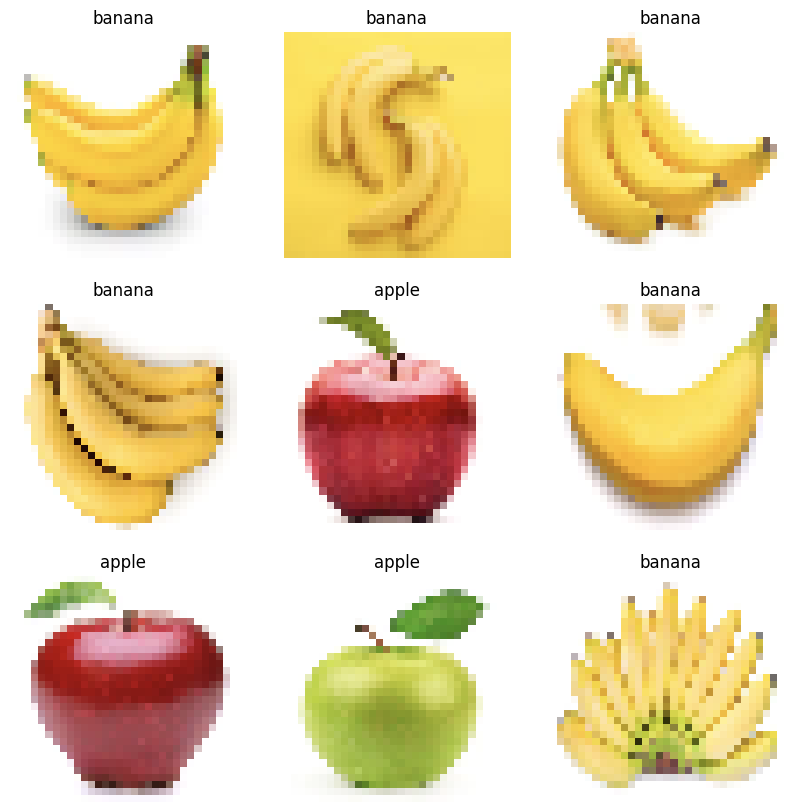

In [ ]:
class_names = ['apple', 'banana','orange']
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="softmax"),
    tf.keras.layers.Dense(3)
])

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=50,
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.7022 - loss: 0.6615 - val_accuracy: 0.6818 - val_loss: 0.6580
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6793 - loss: 0.6594 - val_accuracy: 0.6667 - val_loss: 0.6651
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.6634 - loss: 0.6669 - val_accuracy: 0.6818 - val_loss: 0.6452
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.6961 - loss: 0.6486 - val_accuracy: 0.6818 - val_loss: 0.6382
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.6927 - loss: 0.6198 - val_accuracy: 0.6818 - val_loss: 0.6322
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.6923 - loss: 0.6192 - val_accuracy: 0.6818 - val_loss: 0.6259
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6915 - loss: 0.6227 - val_accuracy: 0.6818 - val_loss: 0.6324
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.7008 - loss: 0.5986 - val_accuracy: 0.66

In [ ]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.6889 - loss: 0.5432


[0.5485299229621887, 0.6769230961799622]

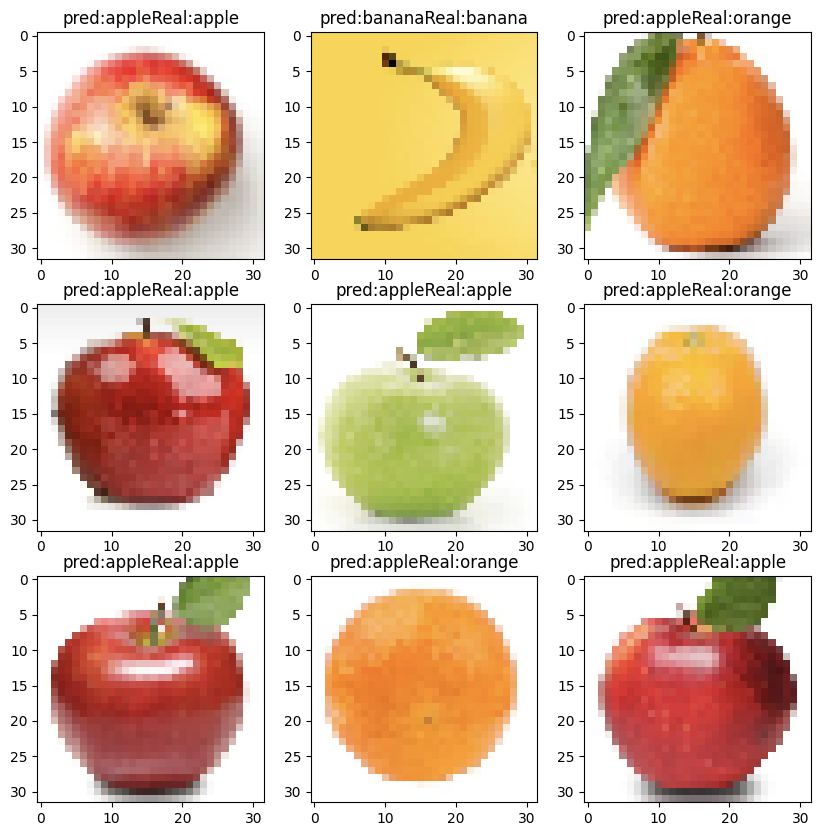

In [ ]:
import numpy
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
  classifications = model(images)
  for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      index = numpy.argmax(classifications[i])
      plt.title("pred:"+ class_names[index]+"Real:"+ class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model) #
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp5381mtvb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133031963919376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133031963922064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133031963922256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133031963923408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133031963923216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133031963923792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133031963923024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133032184625488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133031963924176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133031963925712: TensorSpec(shape=(), dtype=tf.resource, name=None)
